<a href="https://colab.research.google.com/github/aronsalinas96/tensorflow_basics/blob/main/02_NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A few types of clasification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


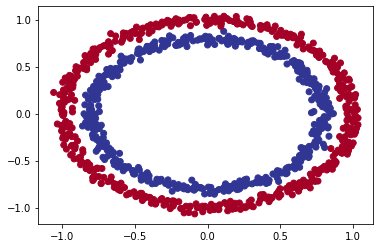

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Steps in modelling

1. Create/import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [5]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 4s 6ms/step - loss: 2.9659 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7231 - accuracy: 0.4370
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.4690
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.4630
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.4500
Epoch 11/

In [6]:
model_1.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

In [7]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

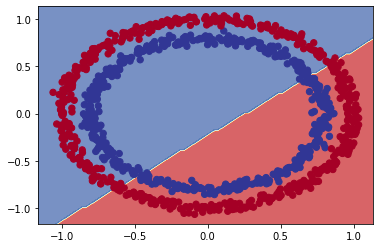

In [8]:
plot_decision_boundary(model=model_1, X=X, y=y)

## Non linear problem

In [9]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.4711 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6246 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9731 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1733 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0409 - accuracy: 0.4270
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9419 - accuracy: 0.4380
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8624 - accuracy: 0.4480
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8413 - accuracy: 0.4520
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8267 - accuracy: 0.4560
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8141 - accuracy: 0.4540
Epoch 11/

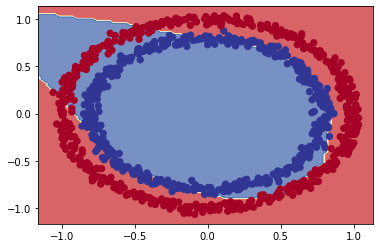

In [10]:
plot_decision_boundary(model=model_2, X=X, y=y)

In [11]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.6964 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5100
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.5210
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.5680
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.5750
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6771 - accuracy: 0.5320
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.5460
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6728 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6706 - accuracy: 0.5400
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6684 - accuracy: 0.5370
Epoch 11/

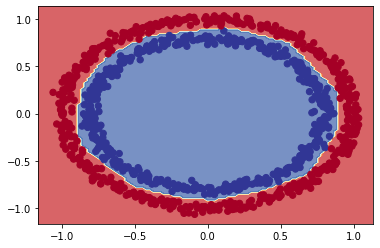

In [12]:
plot_decision_boundary(model=model_3, X=X, y=y)

**Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly?

**Answer:** Non-linear activation function on final layer!

## Evaluating and improving our classification


Let's create a training and test set.

In [13]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[:200], y[:200]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [14]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(8, activation="relu"),
                               tf.keras.layers.Dense(8, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")                           
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6835 - accuracy: 0.5975
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.6212
Epoch 3/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6397 - accuracy: 0.6862
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5975 - accuracy: 0.7987
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.8888
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4195 - accuracy: 0.9538
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3225 - accuracy: 0.9725
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.2379 - accuracy: 0.9750
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.1665 - accuracy: 0.9962
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.1157 - accuracy: 0.9987
Epoch 11/25
25/25 [

In [15]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 1.0000


[0.009841801598668098, 1.0]

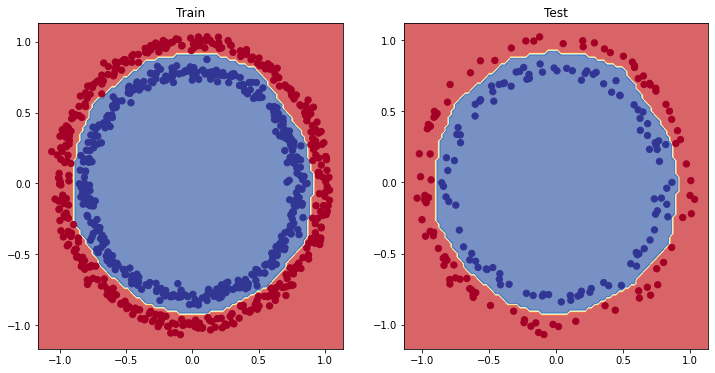

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)

## Plot the loss (or training) curves

In [17]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.683521,0.59750
1,0.664654,0.62125
2,0.639720,0.68625
3,0.597537,0.79875
4,0.528963,0.88875
5,0.419517,0.95375
6,0.322522,0.97250
7,0.237940,0.97500
8,0.166511,0.99625
9,0.115714,0.99875


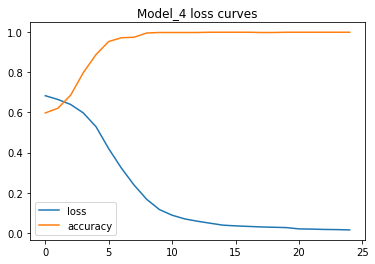

In [18]:
pd.DataFrame(history.history).plot()
plt.title("Model_4 loss curves");

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [19]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(8, activation="relu"),
                               tf.keras.layers.Dense(8, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_5 = model_5.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

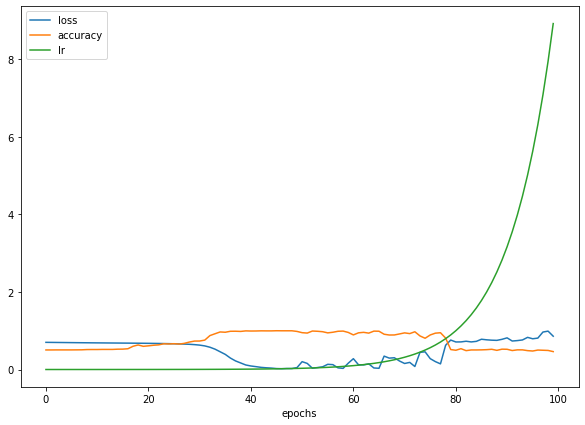

In [20]:
pd.DataFrame(history_5.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

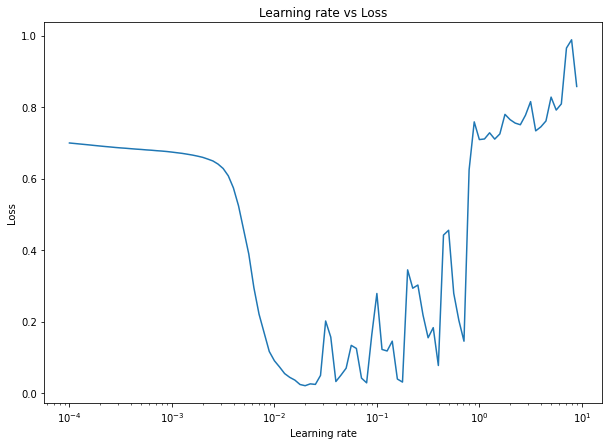

In [21]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_5.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

The best learning rate is close to 0.1 

In [22]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(6, activation="relu"),
                               tf.keras.layers.Dense(6, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["accuracy"])

history_6 = model_6.fit(X_train, y_train, epochs=100, verbose=0)

In [23]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9750


[0.05730311572551727, 0.9750000238418579]

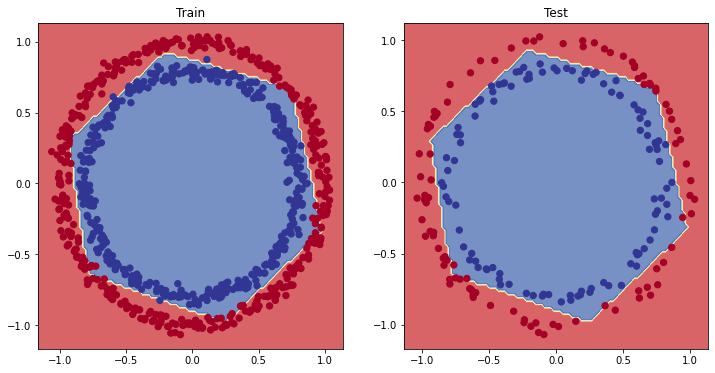

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X=X_test, y=y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible,
there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision 
* Recall
* F1-score
* Confusion matrix
* Clasiffication report (sklearn)


In [25]:
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9750
Model loss on the test set:0.05730311572551727
Model accuracy on the test set:97.50


In [2]:
from sklearn.metrics import confusion_matrix

#y_preds = model_6.predict(X_test)

#confusion_matrix(y_test, y_preds)

The predictions array has come out in prediction probability form , which is the standar output from the sigmoid (or softmax) activation functions.

In [27]:
confusion_matrix(y_test, tf.round(y_preds))

array([[ 91,   5],
       [  0, 104]])

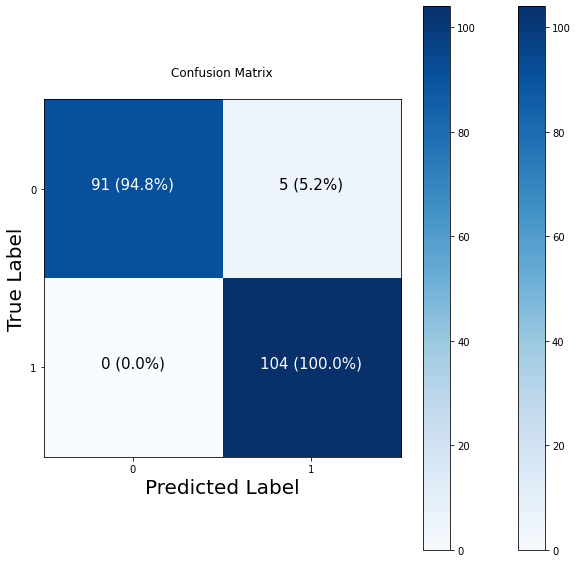

In [28]:
import itertools
figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
fig.colorbar(cax)

classes = False

if classes:
  labesl = classes
else :
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm [i, j] > threshold else "black",
           size=15)

# Multiclass classification

We're going to build a neural network to classify images of different clothes

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [31]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

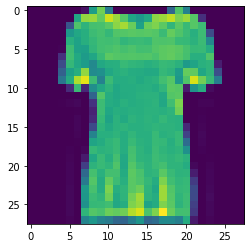

In [33]:
import matplotlib.pyplot as plt
plt.imshow(train_data[10])

In [34]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Coat')

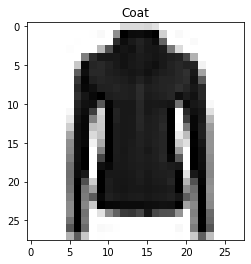

In [41]:
import random
index = random.randint(0, 9999)
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

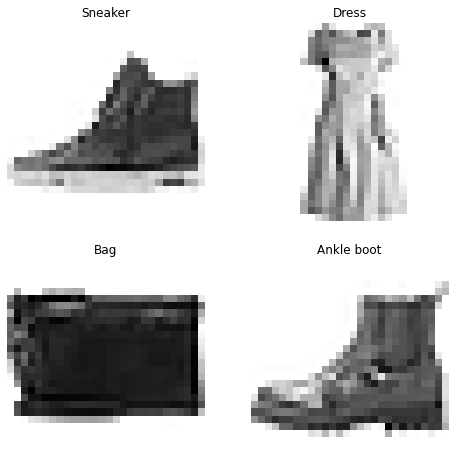

In [43]:
import random
plt.figure(figsize=(8,8))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

We can use a similar architecture to binary classifiers, however, there are some differences:

* Input shape = 28,28 (the shape of one image)
* Output shape = 10 (one for class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy (for one hot coding) or tf.keras.losses.SparseCategoricalCrossentropy() (for integer labels) which is this case.
* Output layer activation = Softmax (not sigmoid)

In [44]:
tf.random.set_seed(42)

model_multiclass_1 = tf.keras.Sequential([
                                          tf.keras.layers.Flatten(input_shape=(28, 28)),
                                          tf.keras.layers.Dense(8, activation="relu"),
                                          tf.keras.layers.Dense(8, activation="relu"),
                                          tf.keras.layers.Dense(10, activation="softmax"),
])

model_multiclass_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

non_norm_history = model_multiclass_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.5800 - accuracy: 0.1158 - val_loss: 2.2361 - val_accuracy: 0.1279
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1334 - accuracy: 0.1707 - val_loss: 1.9240 - val_accuracy: 0.2489
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7210 - accuracy: 0.2718 - val_loss: 1.6313 - val_accuracy: 0.2813
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5852 - accuracy: 0.3333 - val_loss: 1.5335 - val_accuracy: 0.3665
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5357 - accuracy: 0.3583 - val_loss: 1.5435 - val_accuracy: 0.3522
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5083 - accuracy: 0.3619 - val_loss: 1.4881 - val_accuracy: 0.3717
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4920 - accuracy: 0.3676 - val_loss: 1.5275 - val_accuracy:

In [45]:
model_multiclass_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 8)                 6280      
                                                                 
 dense_19 (Dense)            (None, 8)                 72        
                                                                 
 dense_20 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [46]:
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized) --> numbers between 0 & 1

In [47]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [48]:
tf.random.set_seed(42)

model_multiclass_2 = tf.keras.Sequential([
                                          tf.keras.layers.Flatten(input_shape=(28, 28)),
                                          tf.keras.layers.Dense(8, activation="relu"),
                                          tf.keras.layers.Dense(8, activation="relu"),
                                          tf.keras.layers.Dense(10, activation="softmax"),
])

model_multiclass_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

norm_history = model_multiclass_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7501 - accuracy: 0.7416 - val_loss: 0.5449 - val_accuracy: 0.8131
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5023 - accuracy: 0.8263 - val_loss: 0.5863 - val_accuracy: 0.8027
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4681 - accuracy: 0.8386 - val_loss: 0.5106 - val_accuracy: 0.8163
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4490 - accuracy: 0.8456 - val_loss: 0.4888 - val_accuracy: 0.8293
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4407 - accuracy: 0.8467 - val_loss: 0.5037 - val_accuracy: 0.8226
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4323 - accuracy: 0.8504 - val_loss: 0.4788 - val_accuracy: 0.8339
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4262 - accuracy: 0.8511 - val_loss: 0.4784 - val_accuracy:

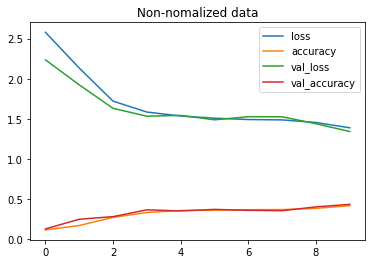

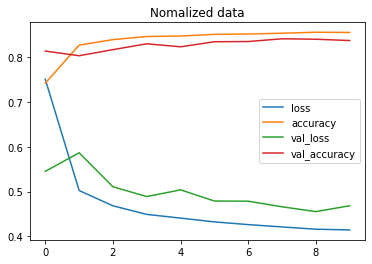

In [49]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-nomalized data")
pd.DataFrame(norm_history.history).plot(title="Nomalized data")

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_multiclass_3 = tf.keras.Sequential([
                                          tf.keras.layers.Flatten(input_shape=(28, 28)),
                                          tf.keras.layers.Dense(8, activation="relu"),
                                          tf.keras.layers.Dense(8, activation="relu"),
                                          tf.keras.layers.Dense(10, activation="softmax"),
])

model_multiclass_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))
norm_callback_history = model_multiclass_3.fit(train_data_norm, 
                                      train_labels, 
                                      epochs=40, 
                                      validation_data=(test_data_norm, test_labels), 
                                      callbacks=[lr_scheduler])

Text(0.5, 1.0, 'Finding the ideal learning rate')

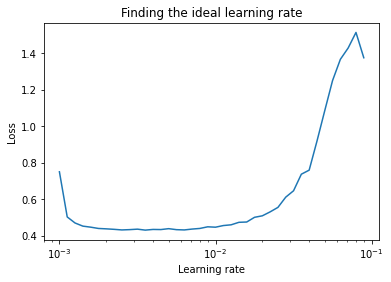

In [54]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, norm_callback_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [56]:
tf.random.set_seed(42)

model_multiclass_4 = tf.keras.Sequential([
                                          tf.keras.layers.Flatten(input_shape=(28, 28)),
                                          tf.keras.layers.Dense(8, activation="relu"),
                                          tf.keras.layers.Dense(8, activation="relu"),
                                          tf.keras.layers.Dense(10, activation="softmax"),
])

model_multiclass_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                           metrics=["accuracy"])

norm_callback_history = model_multiclass_4.fit(train_data_norm, 
                                      train_labels, 
                                      epochs=20, 
                                      validation_data=(test_data_norm, test_labels)
                                      )

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7501 - accuracy: 0.7416 - val_loss: 0.5449 - val_accuracy: 0.8131
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5023 - accuracy: 0.8263 - val_loss: 0.5863 - val_accuracy: 0.8027
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4681 - accuracy: 0.8386 - val_loss: 0.5106 - val_accuracy: 0.8163
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4490 - accuracy: 0.8456 - val_loss: 0.4888 - val_accuracy: 0.8293
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4407 - accuracy: 0.8467 - val_loss: 0.5037 - val_accuracy: 0.8226
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4323 - accuracy: 0.8504 - val_loss: 0.4788 - val_accuracy: 0.8339
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4262 - accuracy: 0.8511 - val_loss: 0.4784 - val_accuracy:

In [69]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else :
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  ax.title.set_size(text_size)

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm [i, j] > threshold else "black",
            size=text_size)

In [60]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [62]:
y_probs = model_multiclass_4.predict(test_data_norm)
y_probs[:5]

array([[4.0176619e-08, 5.2673591e-14, 3.0748367e-06, 7.3735328e-06,
        6.7382324e-08, 6.9948167e-02, 9.9144120e-07, 9.5025763e-02,
        1.2256555e-03, 8.3378887e-01],
       [2.4432738e-05, 3.9999182e-09, 9.6872902e-01, 8.4971191e-07,
        1.1517992e-02, 5.2886467e-18, 1.9700801e-02, 3.8560933e-28,
        2.6963042e-05, 2.0767826e-19],
       [7.7033423e-05, 9.9952650e-01, 2.2692322e-05, 5.6682511e-06,
        3.6790670e-04, 4.1835199e-20, 1.7413662e-07, 0.0000000e+00,
        1.5056290e-09, 7.8271021e-25],
       [5.5473311e-06, 9.9954826e-01, 1.2730967e-04, 2.0524932e-04,
        1.1247314e-04, 4.5774306e-18, 1.0294544e-06, 2.3618891e-36,
        1.8417827e-10, 4.7345672e-18],
       [1.2784047e-01, 8.7048771e-05, 1.2911727e-01, 2.1524867e-02,
        5.5990390e-02, 4.7039178e-10, 6.6005123e-01, 1.4810617e-15,
        5.3887353e-03, 6.4455837e-12]], dtype=float32)

In [63]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[773,   5,  15,  48,   8,   0, 138,   2,  11,   0],
       [  2, 948,   9,  29,   8,   0,   2,   0,   2,   0],
       [ 17,   6, 745,  10, 146,   0,  68,   0,   8,   0],
       [ 23,  11,  17, 827,  61,   1,  51,   0,   8,   1],
       [  0,   1, 105,  15, 812,   0,  58,   0,   9,   0],
       [  0,   0,   0,   1,   0, 927,   0,  46,   6,  20],
       [112,   1, 131,  35, 151,   2, 549,   0,  17,   2],
       [  0,   0,   0,   0,   0,  34,   0, 945,   0,  21],
       [  5,   1,   5,   8,  10,   3,  17,   4, 947,   0],
       [  0,   0,   0,   0,   0,  13,   1,  53,   0, 933]])

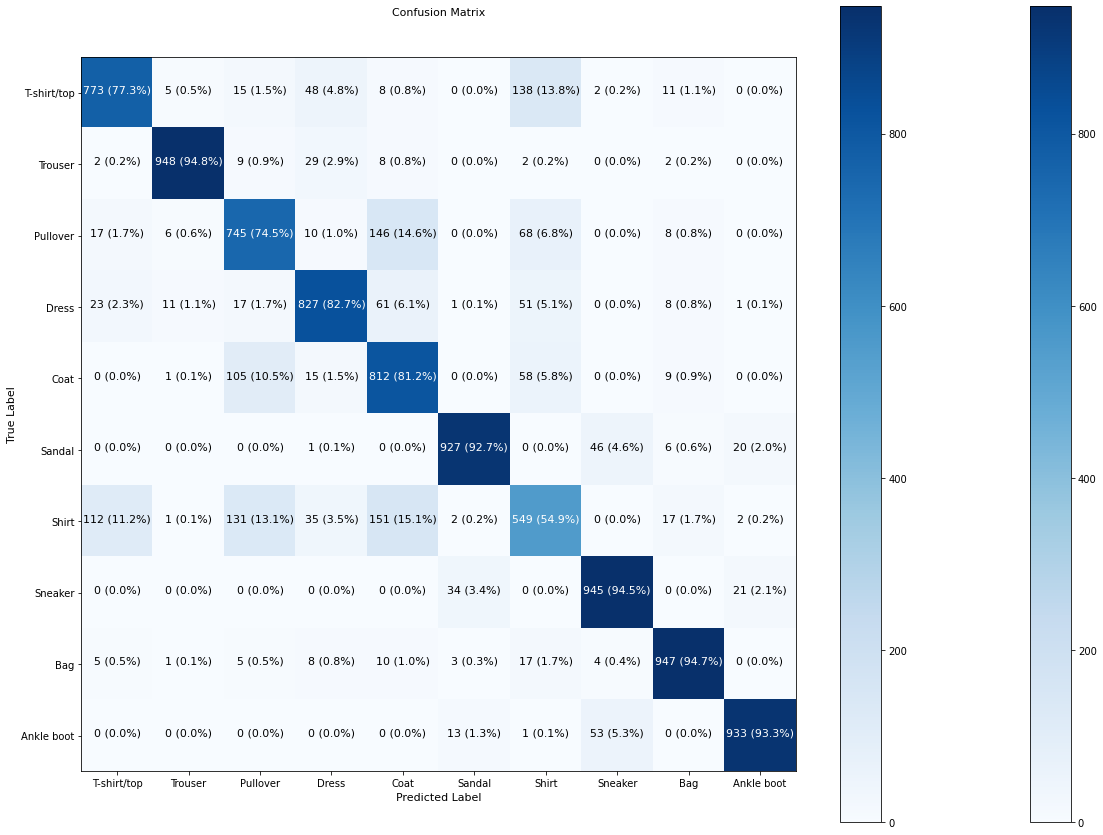

In [74]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(20,15),
                      text_size=11)

Creating a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & predicted label

In [107]:
import random
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  
  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label), 
                                                   color=color)

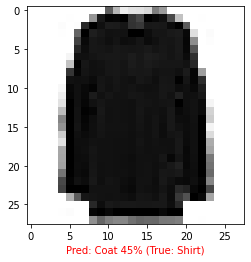

In [149]:
plot_random_image(model=model_multiclass_4,
                  images=test_data_norm, 
                  true_labels=test_labels,
                  classes=class_names)

## What patterns ir our model learning?

In [150]:
weight, biases = model_multiclass_4.layers[1].get_weights()

weight, weight.shape

(array([[-0.23691112, -0.46970534,  0.3174867 , ...,  0.03214733,
          0.57360667,  0.6194539 ],
        [-0.1737258 ,  0.5273308 , -0.10898376, ...,  0.00836685,
          0.36262846, -0.4583625 ],
        [-0.05150471,  0.23372449, -0.7150433 , ...,  0.00797877,
          0.9660661 , -0.454191  ],
        ...,
        [-0.5310022 , -0.16369538,  0.3087529 , ..., -0.09644829,
          0.20831321, -0.5593527 ],
        [-0.552185  , -0.34651962,  0.33132663, ..., -0.04269093,
         -0.5133779 , -0.18756764],
        [-0.55801094,  0.11654328,  0.5096656 , ...,  0.00670667,
          0.29496095, -0.35719126]], dtype=float32), (784, 8))

In [151]:
biases, biases.shape

(array([ 0.3979156 ,  0.8197783 ,  0.04458389, -0.1254978 ,  1.0727916 ,
        -0.01789139,  0.4754089 ,  0.53780323], dtype=float32), (8,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias vector get initialized as zeros (at least in the case of TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

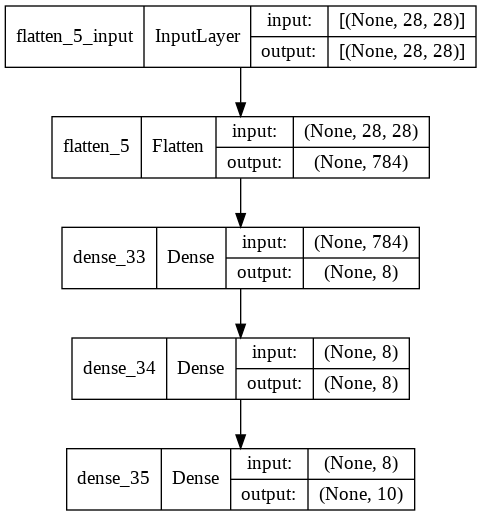

In [152]:
from tensorflow.keras.utils import plot_model
plot_model(model_multiclass_4, show_shapes=True)